In [97]:
import pandas as pd

# Charger le fichier 'clients_clusters.csv'
df_clusters = pd.read_csv('Documents/TSclients_clusters.csv')
df_clusters.head()

,ID_Client,Genre,Âge,Revenu_annuel,Score_depenses,Profession,Experience_travail,Taille_famille,cluster
0,1,Male,19,8439.03120,39,Healthcare,1,4,4
1,2,Male,21,19691.07280,81,Engineer,3,3,4
2,3,Female,20,48383.77888,6,Engineer,1,1,1
3,4,Female,23,33193.52272,77,Lawyer,0,2,2
4,5,Female,31,21378.87904,40,Entertainment,2,6,4


In [98]:
#df1_clusters = df_clusters.drop('Unnamed: 0', axis=1)
df1_clusters.head()

,Genre,Âge,Revenu_annuel,Score_depenses,Profession,Experience_travail,Taille_famille,cluster
0,Male,19,8439.03120,39,Healthcare,1,4,4
1,Male,21,19691.07280,81,Engineer,3,3,4
2,Female,20,48383.77888,6,Engineer,1,1,1
3,Female,23,33193.52272,77,Lawyer,0,2,2
4,Female,31,21378.87904,40,Entertainment,2,6,4


In [63]:
#df1_clusters.to_csv('TSclients_clusters.csv',index=False)

In [64]:
df1_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Client           1965 non-null   int64  
 1   Genre               1965 non-null   object 
 2   Âge                 1965 non-null   int64  
 3   Revenu_annuel       1965 non-null   float64
 4   Score_depenses      1965 non-null   int64  
 5   Profession          1965 non-null   object 
 6   Experience_travail  1965 non-null   int64  
 7   Taille_famille      1965 non-null   int64  
 8   cluster             1965 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 138.3+ KB


In [65]:
# Supprimer la colonne ID_Client
df1_clusters = df1_clusters.drop(columns=['ID_Client'])

# Regrouper les clients par cluster et calculer les moyennes de chaque caractéristique pour chaque cluster
df_means = df1_clusters.groupby('cluster').mean()

# Analyser les moyennes de chaque cluster pour identifier les caractéristiques communes de chaque segment de clientèle
print(df_means)

               Âge  Revenu_annuel  Score_depenses  Experience_travail  \
cluster                                                                 
0        48.459459   97405.583077       51.395577            4.422604   
1        50.896552   56126.274470       51.350913            4.152130   
2        47.950820   37029.582346       49.434426            3.844262   
3        49.435449   77526.897784       52.663020            4.264770   
4        43.925000   12274.102045       49.541667            3.083333   

         Taille_famille  
cluster                  
0              3.796069  
1              3.782961  
2              3.670082  
3              4.032823  
4              2.825000  


In [66]:
df_means.head()

,Âge,Revenu_annuel,Score_depenses,Experience_travail,Taille_famille
cluster,,,,,
0,48.459459,97405.583077,51.395577,4.422604,3.796069
1,50.896552,56126.274470,51.350913,4.152130,3.782961
2,47.950820,37029.582346,49.434426,3.844262,3.670082
3,49.435449,77526.897784,52.663020,4.264770,4.032823
4,43.925000,12274.102045,49.541667,3.083333,2.825000


In [67]:
#df_means.to_csv('df_means.csv',index=False)

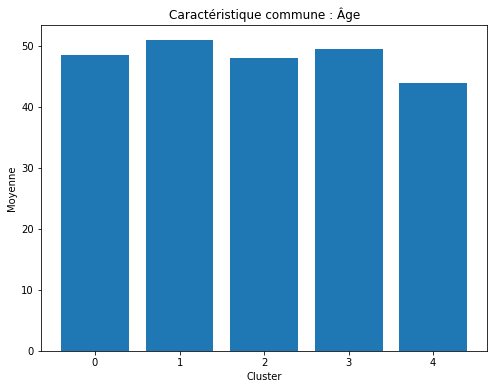

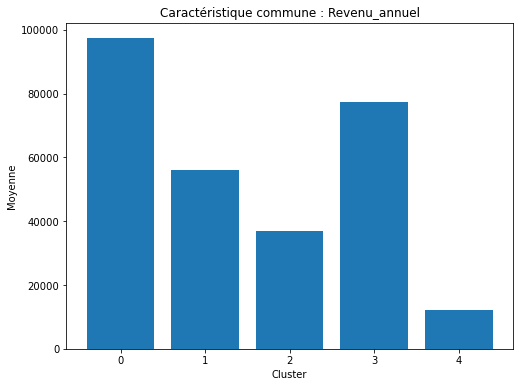

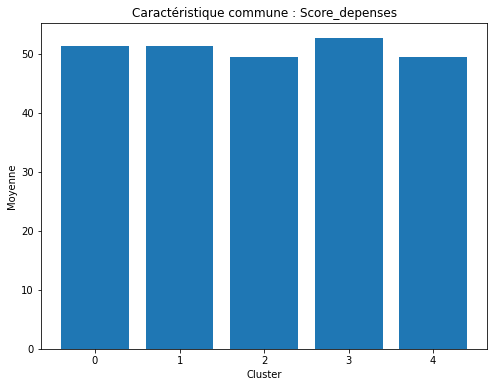

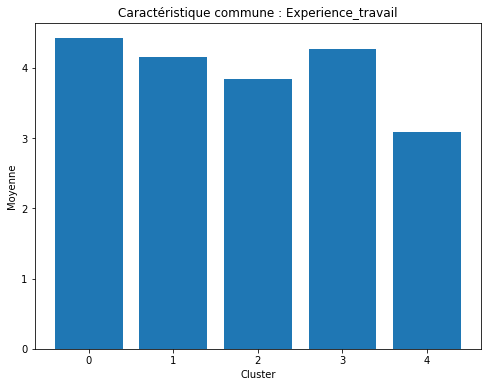

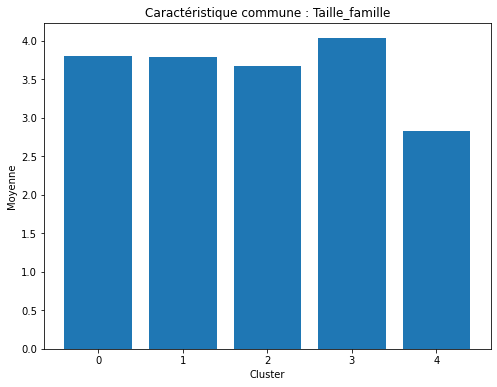

In [68]:
#graphique à barres pour chaque caractéristique (Âge, Revenu_annuel, etc.), montrant les moyennes pour chaque segment de clientèle (Cluster 0, Cluster 1, etc.).

import matplotlib.pyplot as plt

# Créer une liste des caractéristiques à inclure dans le graphique
caracteristiques = ['Âge', 'Revenu_annuel', 'Score_depenses', 'Experience_travail', 'Taille_famille']

# Créer une boucle pour tracer un graphique pour chaque caractéristique
for c in caracteristiques:
    plt.figure(figsize=(8, 6))
    plt.title('Caractéristique commune : ' + c)
    plt.xlabel('Cluster')
    plt.ylabel('Moyenne')
    plt.bar(df_means.index, df_means[c])
    plt.show()

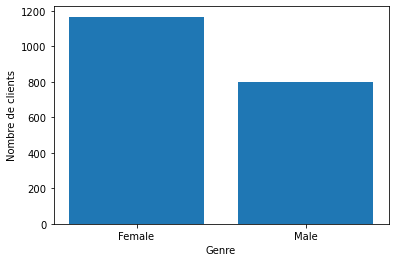

In [70]:
import matplotlib.pyplot as plt

genre_counts = df1_clusters['Genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Nombre de clients')
plt.show()

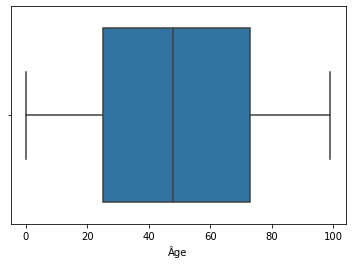

In [71]:
import seaborn as sns

sns.boxplot(x=df1_clusters['Âge'])
plt.xlabel('Âge')
plt.show()

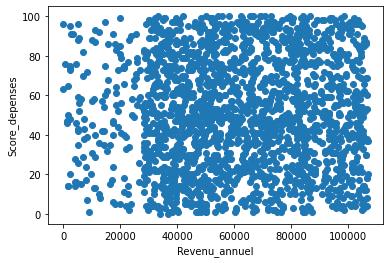

In [73]:
plt.scatter(x=df1_clusters['Revenu_annuel'], y=df1_clusters['Score_depenses'])
plt.xlabel('Revenu_annuel')
plt.ylabel('Score_depenses')
plt.show()

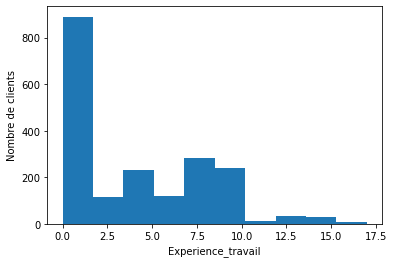

In [74]:
plt.hist(df1_clusters['Experience_travail'], bins=10)
plt.xlabel('Experience_travail')
plt.ylabel('Nombre de clients')
plt.show()

In [79]:
df1_clusters.head()

,Genre,Âge,Revenu_annuel,Score_depenses,Profession,Experience_travail,Taille_famille,cluster
0,Male,19,8439.03120,39,Healthcare,1,4,4
1,Male,21,19691.07280,81,Engineer,3,3,4
2,Female,20,48383.77888,6,Engineer,1,1,1
3,Female,23,33193.52272,77,Lawyer,0,2,2
4,Female,31,21378.87904,40,Entertainment,2,6,4


In [81]:
#calculer les moyennes de chaque colonne numérique (à l'exception de la colonne ID_Client)
moyenne_clusters = df_clusters.groupby('ID_Client')['Âge','Revenu_annuel', 'Score_depenses', 'Experience_travail', 'Taille_famille', 'cluster'].mean()
moyenne_clusters.head()

/var/folders/dc/3kctpvrd2zlg0cw49lyshw3w0000gn/T/ipykernel_57824/696530303.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moyenne_clusters = df_clusters.groupby('ID_Client')['Âge','Revenu_annuel', 'Score_depenses', 'Experience_travail', 'Taille_famille', 'cluster'].mean()


,Âge,Revenu_annuel,Score_depenses,Experience_travail,Taille_famille,cluster
ID_Client,,,,,,
1,19.0,8439.03120,39.0,1.0,4.0,4.0
2,21.0,19691.07280,81.0,3.0,3.0,4.0
3,20.0,48383.77888,6.0,1.0,1.0,1.0
4,23.0,33193.52272,77.0,0.0,2.0,2.0
5,31.0,21378.87904,40.0,2.0,6.0,4.0


In [99]:
#moyenne_clusters.to_csv('TS_moyenne_clusters.csv',index=True)

In [102]:
#créer une nouvelle DataFrame avec des colonnes d'une DataFrame existante

dfsans = df_clusters[['ID_Client', 'Genre', 'Profession']]
dfsans.head()

,ID_Client,Genre,Profession
0,1,Male,Healthcare
1,2,Male,Engineer
2,3,Female,Engineer
3,4,Female,Lawyer
4,5,Female,Entertainment


In [104]:
dfsans.to_csv('TS_dfsans.csv',index=False)